# 7. 비지도 학습

PCA(Principal Component Analysis) : 주성분 분석

-차원 축소 기법 중 대표적인 기법

-PCA는 종합점수를 잘 계산하는 방법이다.

-고차원에서 저차원으로 축소하는 선형 투형 기법

-데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커짐

ex)100개의 차원도 2개의 차원으로 줄일 수 있음

PCA가 말하는것은 데이터들을 정사영 시켜 차원을 낮춘다면 어떤 백터에 데이터들을 정사영 시켜야 원래의 데이터 구조를 제일 잘 유지할 수 있을까? 라는 질문에서 출발

행렬은 선형 변환이며 백터공간을 다른 벡터 공간으로 mapping하는 선형 변환

공분산 행렬의 기하학적의미는 행렬을 통해 어떤 방향으로 퍼진 정도를 나타낸다.

고유벡터는 그 행렬이 벡터의 변화에 작용하는 주축 방향을 나타낸다. 공분산 행렬의 고유벡터는 데이터가 어떤 방향으로 분산되어 있는지를 찾아줌.

고윳값의 의미 : 고유벡터 방향으로 얼마만큼의 크기로 벡터 공간이 늘려지는지를 의미함

PCA 단계
![](./pca_02.png)
-데이터 분산이 최대인 축을 찾음(첫번째 축) - 고유백터 1, 축의 길이가 고유값

-첫번째 축과 직교하면서 분산이 최대인 축을 찾음(두번째 축) - 고유벡터 2

-첫번째와 두번째 축에 직교하고, 분산이 최대인 축을 찾음(세번째 축)

![](./pca_03.png)

![](./bi_02.png)

https://www.youtube.com/watch?v=YEdscCNsinU

https://angeloyeo.github.io/2019/07/27/PCA.html

PCA 전단계

In [67]:
#라이브러리 불러오기
import pandas as pd

In [68]:
#와인데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [69]:
#데이터 확인하기
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [70]:
data.shape

(178, 13)

In [71]:
#스케일링
#스탠다드 스케일링
#PCA(Principal Component Analysis)에서는 feature들의 Scale에 따라 계산 결과가 영향을 받는 경우가 있습니다. 예를 들어 한 feature가 다른 feature들에 비해 값이 매우 커서 계산 결과에 큰 영향을 주는 경우가 생길 수 있습니다. 이러한 영향을 최소화하기 위해 PCA를 적용하기 전에 feature들의 scale을 조정해주는데, 대표적으로 사용하는 방법 중 하나가 Standard Scaling입니다. 이 방법은 feature의 평균을 0, 표준편차를 1로 만들어줍니다. 이를 통해 서로 다른 feature들의 값을 같은 스케일로 조정해줌으로써 PCA 할 때 계산 결과에 영향을 주는 feature scale의 문제를 해결할 수 있습니다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [72]:
#데이터 복사(df변수)
df = data.copy()

PCA

In [73]:
#PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [74]:
#PCA 적용
pca = PCA(n_components=2)

In [75]:
#PCA 변환
df = pca.fit_transform(df)

In [76]:
#PCA 변환된 데이터 확인
df.shape

(178, 2)

In [77]:
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

PCA 2차원 시각화

In [78]:
#시각화 라이브러리
import matplotlib.pyplot as plt

In [79]:
#데이터 프레임 변환
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
df.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


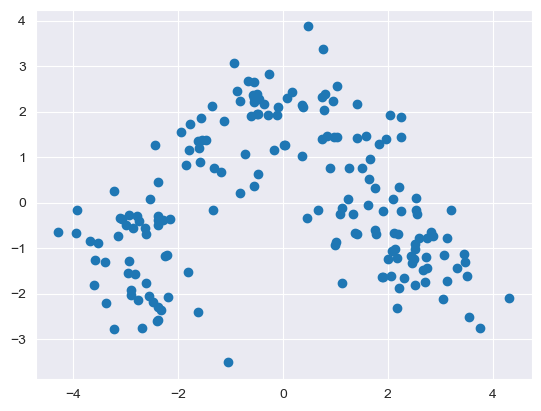

In [80]:
#scatter plot
plt.scatter(df['PC1'], df['PC2'])
#plt.scatter(df.iloc[:, 0], df.iloc[:, 1]) 같은 코드

In [81]:
#전부다 파란색 점으로 나와서 타겟 구분이 안된다
#타겟 확인
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

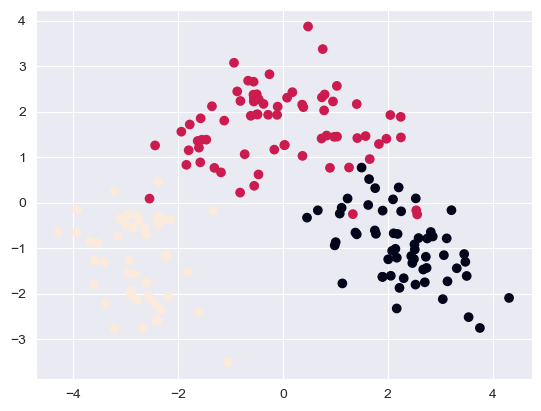

In [82]:
#타겟 컬러 속성 추가
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

In [83]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
# 첫번째 데이터가 36% 두번째 데이터가 19% 정도의 설명력을 가짐

[0.36198848 0.1920749 ]


In [84]:
# 두가지를 합쳤을때 55%의 설명력을 가짐
print(pca.explained_variance_ratio_.sum())

0.5540633835693534


** PCA를 이용해 차원 축소를 하면서, 손실된 정보의 양(설명력)를 확인하는데, 대표적으로 주성분의 누적 설명 분산 비율(cumulative explained variance ratio)을 계산해서 판단합니다. 각 주성분이 전체 데이터 분산에서 차지하는 비율을 고려하여, 분산의 비율이 높은 주요한 주성분부터 순서대로 선택하여 나갈 때, 누적 설명 분산 비율은 차원 축소 후에도 얼마나 많은 정도의 설명력이 유지될 수 있는지를 나타냅니다. 예를 들어, 90% 누적 설명 분산 비율이라면, 원본 데이터의 90%까지 성분을 유지하면서, 10%정도의 손실된 정보를 감수하게 됩니다. 설명력이 높을수록 기존 데이터의 정보를 유지할 확률이 높아지므로, 이 경우 축소된 데이터를 이용한 분석이 더 좋은 결과를 보일 가능성이 큽니다. 그러나, 설명력이 적다고 해서 축소된 데이터가 꼭 쓸모 없다는 것은 아니며, 적절한 차원 축소 방법을 선택하여 활용할 필요가 있습니다.

지도학습( PCA 전후 비교)

In [85]:
#PCA 후 데이터로 머신러닝(2개의 피쳐)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state = 2002)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()

0.9493650793650794

In [86]:
#PCA 전 데이터로 머신러닝(13개의 피쳐)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()


0.9777777777777779

PCA (3차원) 시각화

In [87]:
# 새 데이터 복사
df = data.copy()

In [88]:
# PCA (3차원) 적용
pca = PCA(n_components=3)

In [89]:
# PCA 변환
#3차원 데이터를 PCA 모델에 fit_transform() 함수를 사용하여 변환하면, 주어진 데이터의 주요한 패턴을 반영하는 3개의 차원으로 데이터가 변환됩니다. 즉, 주성분에 의해서 분산이 큰 방향으로 데이터가 이동하면서 새로운 좌표계를 만들어내는 것입니다. 이렇게 변환된 데이터는 3개의 주성분이 각각 x, y, z축이 되는 3차원 공간에 표현됩니다.
df = pca.fit_transform(df)

In [90]:
# 데이터 프레임 변환
df = pd.DataFrame(df)

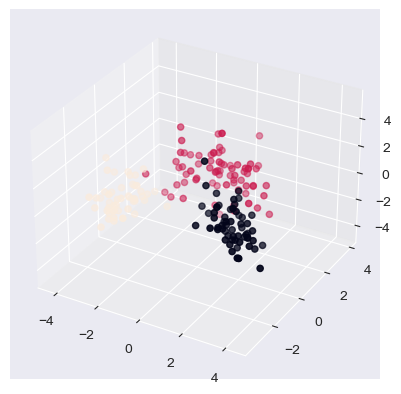

In [91]:
# 3차원 시각화
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0],df.iloc[:,1], df.iloc[:,2],c=dataset.target)

점진적 PCA
-데이터 셋이 큰 경우 활용(배치를 통해 점진적 수행)

PCA는 대량의 데이터셋을 처리할 때 항상 가능한 것은 아닙니다. 대부분의 PCA 구현은 데이터 전체를 메모리에 올린 후 SVD나 역방향 자르기(dual method)를 사용해 분해합니다. 이 때문에, PCA는 대규모 데이터를 다루기엔 부적합합니다. 점진적 PCA 참조와 같이 메모리의 제약이 없는 상황에서 PCA를 적용할 필요가 있습니다. 미니 배치를 이용해 점진적으로 PCA를 구현함.

In [92]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [93]:
# 데이터 복사
df = data.copy()

In [94]:
# 점진적 PCA 적용
pca = IncrementalPCA(n_components=2)

In [95]:
# 점진적 PCA 변환
df = pca.fit_transform(df)

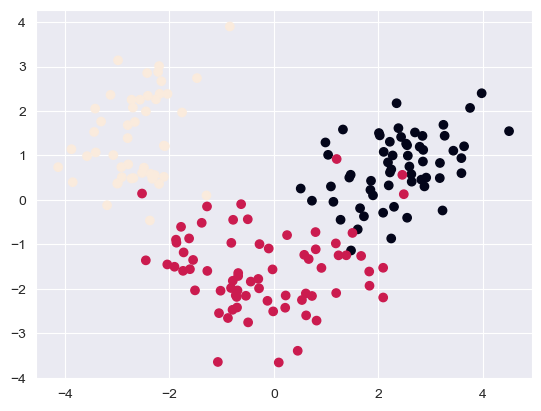

In [96]:
# 시각화
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

In [97]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)

[0.34777547 0.17419062]


In [98]:
# 두가지를 합쳤을때 52%의 설명력을 가짐
print(pca.explained_variance_ratio_.sum())

0.521966091973267


희소 PCA
-적절한 희소성을 유지(alpha 값으로 조정)
-오버피팅 방지
-희소 PCA(Scikit-learn에서는 SparsePCA)는 기존의 PCA와는 달리, 비교적 적은 수의 주성분으로 원본 데이터를 대체할 수 있는 경우, 이를 이용해 데이터를 분해하는 방법입니다. 주성분 추출의 결과물로 얻어진 주성분의 각 요소별로 대부분이 0인 sparse 벡터(sparse component)를 갖는 것이 기존 PCA와 다른 특징입니다. 희소PCA는 일반적으로 많은 양의 feature를 가진 데이터에서 사용됩니다. 이 때 사용하는 방법으로는 lasso와 같은 규제 방법을 이용합니다. 이를 이용해 대부분 관측되지 않는(0에 가까운) 주성분들을 제거합니다. 이는 기존 PCA의 과도한 노이즈를 제거해주는 효과가 있으며, 가장 중요한 주성분들만을 추출할 수 있게 해줍니다. 또한, PCA와 마찬가지로 희소PCA는 차원축소(dimensionality reduction) 방법으로서, 학습 시간을 줄이고, 데이터를 구성하는 feature의 개수를 줄여 예측 정확도를 향상시킵니다.

-Sparse PCA는 피쳐가 매우 많은 자료에 대해서 사용할 수 있는 PCA기법이다. 기본적인 컨셉은 전체 피쳐를 사용하는 것이 아니라, 중요하다고 생각되는 피쳐에 대해서만 PCA를 해주는 기법이라고 한다.

In [99]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [100]:
# 데이터 복사
df = data.copy()

In [101]:
# 희소 PCA 적용
pca = SparsePCA(n_components=2, alpha=0.0001)

In [102]:
# 희소 PCA 변환
df = pca.fit_transform(df)

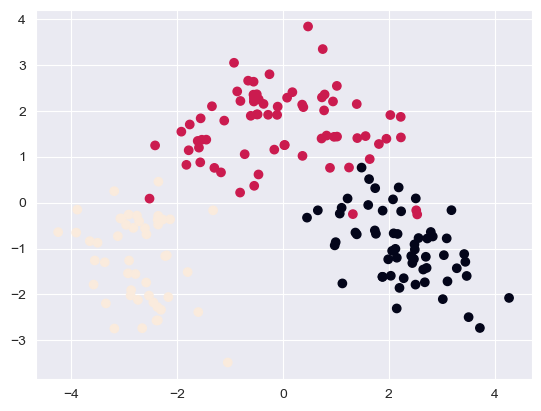

In [103]:
# 시각화
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

커널PCA
-비선형으로 차원축수

-Kernel PCA는 선형적 정보만을 뽑아낸다는 PCA의 단점을 해결하기 위해 개발된 기법이다.

기존 디자인 매트릭스 X를 변환(Transfrom)시키면 비선형에 대응할 수 있지만, 그만큼 계산량이 기하급수적으로 늘어나는 단점이 있다. Kernel PCA는 Kernel Trick을 사용해서 이러한 계산량을 극적으로 줄일 수 있다.

-Kernel PCA(Kernel Principal Component Analysis)는 고차원 데이터를 차원 축소하는 비선형 주성분 분석 방법입니다. 기존의 PCA와 다르게 선형이 아닌 커널 함수를 이용해 차원 축소를 수행합니다. Kernel PCA에서는 가우시안, 폴리노미얼, 시그모이드와 같은 다양한 커널 함수를 사용할 수 있습니다. 그리고 각각의 커널 함수에 따라서 주성분들의 차원 축소 결과에 다른 영향을 미칩니다. Kernel PCA의 목적은 저차원 공간에서 비선형 분류 문제를 선형 분류 문제로 변경하는 것입니다. Kernel PCA는 또한 이미지 처리 분야에서도 널리 사용됩니다. 이미지의 경우 고차원 매트릭스 형태로 표현되기 때문에, 저차원 표현으로 축소된 이미지를 사용하면 처리 속도가 향상되므로 매우 유용합니다. 하지만 Kernel PCA는 기존 PCA보다 학습 시간이 오래 걸리고, kernel 함수에 따라 결과가 상이하게 나타날 수 있으며, hyperparameter 설정에 따라 결과가 크게 달라질 수 있기 때문에 주의해서 사용해야합니다.

In [104]:
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA

In [105]:
# 데이터 복사
df = data.copy()

In [106]:
# 커널 PCA 적용
pca = KernelPCA(n_components=2)

In [107]:
# 커널 PCA 변환
df = pca.fit_transform(df)


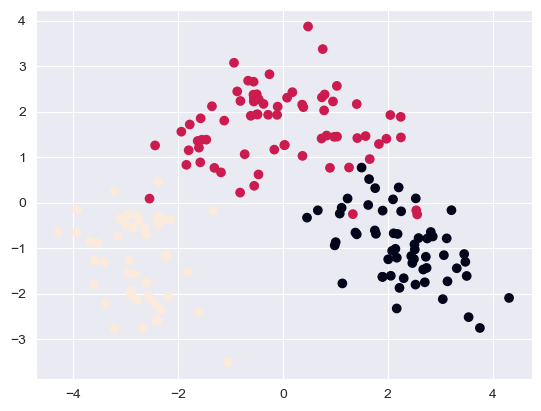

In [108]:
# 시각화
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

SVD (Singular Value Decomposition) 특이값 분해
-행렬을 특정한 구조로 분해하는 방식
-신호 처리와 통계학 등의 분야에서 자주 사용됨
-https://angeloyeo.github.io/2019/08/01/SVD.html

- SVD는 특이값 분해라고도 하며, 행렬을 특정한 구조로 분해하는 방식입니다. 행렬을 분해한다는 것은 행렬을 여러 개의 행렬의 곱으로 나타낸다는 것을 의미합니다. SVD는 특이값이라는 것을 이용해 행렬을 분해합니다. 특이값은 행렬에 있는 정보의 양을 나타냅니다. 특이값이 크다는 것은 행렬에 많은 정보가 담겨있다는 것을 의미합니다. SVD는 특이값이 큰 정보를 기준으로 행렬을 분해합니다. SVD는 특이값이 큰 정보를 기준으로 행렬을 분해하기 때문에, 행렬의 크기를 줄이는 데에 사용됩니다. 행렬의 크기를 줄이는 것은 차원을 축소하는 것과 같습니다.

-축소형 특이값 분해: 우리는 보통 주어진 데이터가 얼마나 많은 정보를 가지고 있는지 체크하고, 노이즈 데이터를 제거하기 위해, 주 데이터의 차원을 축소하고자 합니다. 이 때, SVD를 이용하면 특이값을 분석하여 불필요한 데이터를 제거하고, 더 작은 차원의 고유벡터로 데이터를 표현할 수 있습니다.

In [109]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [110]:
# 데이터 복사
df = data.copy()

In [111]:
# SVD 적용
svd = TruncatedSVD(n_components=2)

In [112]:
# SVD 변환
df = svd.fit_transform(df)

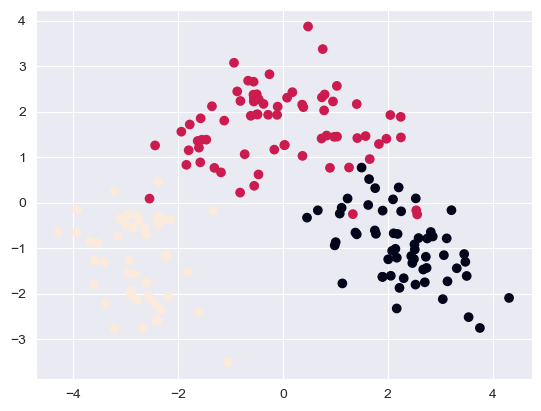

In [113]:
# 시각화
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

## 군집(클러스터링)

-군집분석은 유사성이 높은 대상의 집단을 분류하는 분석방법

-계층적 군집분석과 비계층적 군집분석으로 구분

  -> 전통적인 계층적 군집분석은 군집의 개수를 나중에 선정함

  ->군집의 개수가 정해지지 않았을 때 사용합니다. 군집의 개수를 모를 때 사용하기 때문에 몇 개의 군집으로 나누어야 하는지 결정하기 위해 사용하기도 합니다.

  -> 덴드로그램(Dendrogram)은 계층적 군집 분석에서 사용되는 트리 형태의 시각화 도구입니다.

  이는 군집 간의 거리(또는 유사성)를 나타낼 때 도움이 됩니다. 덴드로그램은 각 데이터 포인트를 개별 군집으로 시작하고 차례대로 군집을 병합하거나 나누면서 구성됩니다. 덴드로그램의 주요 구성 요소는 다음과 같습니다

  잎(Leaf) : 각 데이터 포인트를 나타내는 가장 하위 수준의 요소.

  가지(Branch) : 데이터 포인트 또는 군집들을 연결하는 덴드로그램의 각 구성 요소.

  연결(Link) : 두 개의 가지가 만나는 지점으로, 해당 두 군집 간의 거리(또는 유사성)를 나타냅니다.

  덴드로그램은 다음과 같은 방법으로 해석됩니다:
  덴드로그램의 가로축은 각 데이터 포인트를 나타냅니다. 세로축은 거리 또는 유사성 메트릭을 나타냅니다.

  데이터 포인트들이 병합되면서 덴드로그램에서 상향 방향으로 이동합니다. 유사성이 낮은 군집은 세로축에서 더 높은 위치에서 결합됩니다.

  덴드로그램을 사용하여 적절한 클러스터 수를 결정할 수도 있습니다. 이를 위해 덴드로그램에서 수평선을 그리면 원하는 클러스터의 수를 얻을 수 있습니다. 이 수평선은 일정한 거리에서 가장 많은 분기점들을 가로 질러야 합니다. 이 방법은 군집화에서 효과적인 클러스터 수를 찾는 데 도움이 됩니다.

  ->비계층적 군집(Non-Hierarchical Clustering)
다변량 자료의 산포를 나타내는 여러 측도를 이용하여 판정 기준을 최적화시키는 방법으로 군집을 나누는 방법입니다. 한 번 분리된 개체도 반복적으로 시행하는 과정에서 재분류될 수 있습니다.
사전에 군집의 개수가 정해져 있을 경우에 사용하며, 대표적인 방법으로는 k-mean clustering이 있습니다.

  -> 비계층적 군집분석인 K-mean는 군집의 수를 가장 먼저 선정함

  -> K-mean 군집분석은 초기 중심값은 임의로 선정하며, 중심값이 이동함

-군집분석의 평가지표

  -> 실루엣 계수(silhouette coefficient) : 군집의 밀집도를 계산하여 군집의 품질을 평가하는 지표
  -> 실루엣 계수는 -1 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋은 군집화를 나타냄

  -> 실루엣 계수가 0에 가까울수록 중첩되는 데이터가 많음

  -> 실루엣 계수가 음수일 경우 잘못된 군집화를 의미함

  -> 실루엣 계수가 0.5 이상이면 군집화가 잘 된 것으로 판단함

  -> Dunn Index : 군집 내의 거리가 가깝고, 군집 간의 거리가 멀수록 군집화가 잘 된 것으로 판단함

  -> Davies Bouldin Index : 군집 간의 거리가 가깝고, 군집 내의 거리가 멀수록 군집화가 잘 된 것으로 판단함

  -> Calinski Harabasz Index : 군집 간의 분산이 크고, 군집 내의 분산이 작을수록 군집화가 잘 된 것으로 판단함

![](./bi_03.png)
![](./bi_04.png)

In [114]:
# 비계층적 군집분석
# K-평균군집(cenroid) : 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
# n-clusters : 군집의 개수 하이퍼 파라미터 반드시 설정
# n_init : 초기 중심값을 몇 번 선택할 것인지 설정


# KMeans 라이브러리
from sklearn.cluster import KMeans

In [115]:
# 데이터 불러오기
from sklearn.datasets import load_wine
import pandas as pd
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [116]:
# KMeans 선언 및 학습
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10)

In [117]:
#KMeans 예측
pred = kmeans.predict(df)

In [118]:
# 실제값과 예측값 비교
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0


PCA(차원축소) -> 군집 -> 시각화

In [119]:
#PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df, columns=['pca1', 'pca2'])
df.head()

,pca1,pca2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [120]:
#KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pca1,pca2,kmeans
0,318.562979,21.492131,2
1,303.097420,-5.364718,2
2,438.061133,-6.537309,2
3,733.240139,0.192729,2
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,0
174,3.131605,2.335191,0
175,88.458074,18.776285,0
176,93.456242,18.670819,0


In [121]:
#각 군집의 중심점
centers = kmeans.cluster_centers_

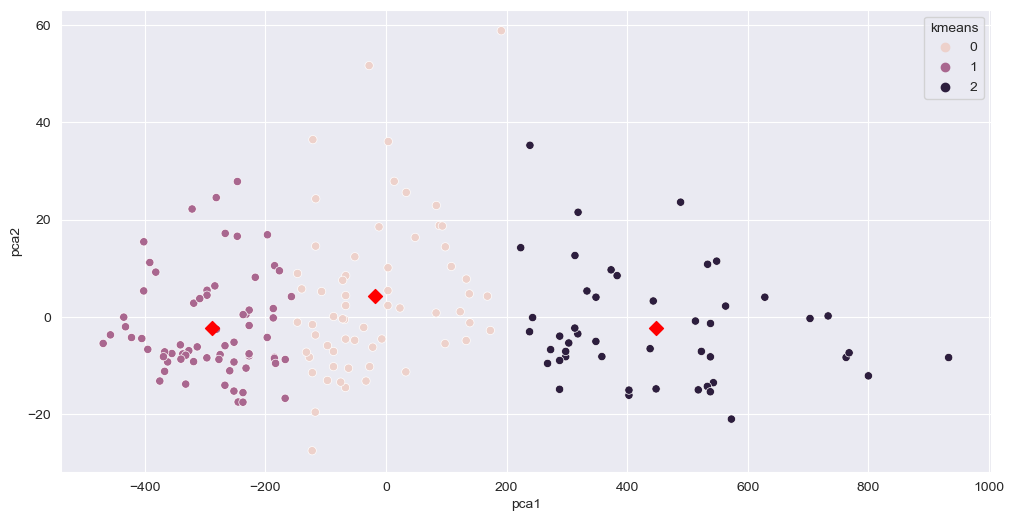

In [122]:
#시각화
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:,0], centers[:,1], s=50, marker='D', c='r')

클러스터 개수 찾는 방법(엘보우 방법,elbow method)

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

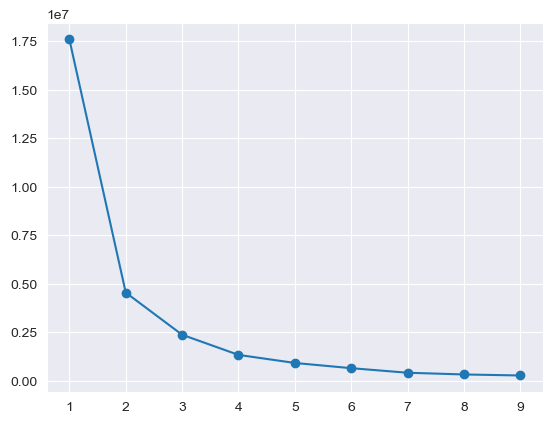

In [123]:
# 군집 수 찾기
# inertia : 군집 내 데이터와 중심점간의 거리의 합
# 군집 수가 증가할수록 inertia는 감소
# inertia가 급격히 감소하는 지점이 최적의 군집 수
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')

계층적 군집분석

- k-means와 달리 군집 개수를 사전에 설정하지 않음

- 덴드로그램

In [124]:
#덴드로그램
#덴드로그램(Dendrogram)은 군집 분석의 결과를 나타낸 그래프 중 하나입니다. 가지와 노드로 구성되어 있으며, 가지의 길이는 데이터간 거리 혹은 유사도를 나타냅니다. 군집을 구성하는 데이터간의 거리 혹은 유사도는 주로 계측 연결법, 평균 연결법, 와드 연결법 등을 사용합니다. 덴드로그램은 먼저 전체 데이터셋을 하나의 군집으로 보고, 가장 비슷한 군집들을 차례로 합쳐가며 끝까지 분리될 때까지 군집을 형성합니다. 결과적으로 덴드로그램은 군집 분석 결과를 시각화하는 데 있어서 유용한 도구이며, 데이터 간의 계층 구조와 유사도, 군집 갯수를 파악하는 데에도 도움을 줍니다. 덴드로그램을 그리는 과정에서 군집간 거리의 변화를 파악할 수 있으며, 이를 통해 최적의 군집 수를 결정할 수도 있습니다.
from scipy.cluster.hierarchy import dendrogram, ward
#PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df, columns=['pca1', 'pca2'])
df.head()


,pca1,pca2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [125]:
#샘플링
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
dataset.target[:3]

/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_10605/2449541701.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kdata = kdata.append(df[70:73])
/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_10605/2449541701.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kdata = kdata.append(df[160:163])


array([0, 0, 0])

In [126]:
#검증
kdata

,pca1,pca2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.99151241147141, 30.99151241147141, 0.0],
  [0.0, 147.877877959848, 147.877877959848, 30.99151241147141],
  [0.0, 48.0273785221509, 48.0273785221509, 0.0],
  [0.0, 88.07194000276088, 88.07194000276088, 48.0273785221509],
  [0.0, 135.87135248973365, 135.87135248973365, 88.07194000276088],
  [0.0, 190.03011431770972, 190.03011431770972, 0.0],
  [135.87135248973365,
   461.0158736911474,
   461.0158736911474,
   190.03011431770972],
  [147.877877959848,
   1026.3965443828533,
   1026.3965443828533,
   461.0158736911474]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2

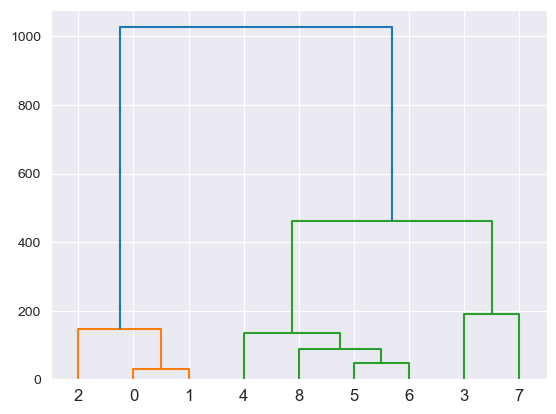

In [127]:
#덴드로그램
linkage = ward(kdata)
dendrogram(linkage)

파란색 선까지 자르면 C2, 파란색 선 1개와 녹색선 2개까지 C3 그아래로 내려가면 수많은 클러스터가 생성된다.

위에서 3개 군집 기준으로 묶었을때 0,1,2 가 0번 군집, 3,4,5가 1번 군집 6,7,8이 2번 군집이라 보고 결과를 확인 시 3번은 1번 군집이 아닌 2번 군집으로 6,8번은 2번 군집이 아닌 1번 군집으로 수정된것을 확인 할 수 있다. 0번은 군집이 잘 된 것으로 판단할 수 있다.


In [128]:
# 실습문제
# Q. 아래 코드를 실행하면 영상처럼 wine 데이터에 target 컬럼과 pred 컬럼이 생깁니다.
# 이때 영상에서 설명한 바와 같이 target의 0,1,2 값 각각이 의미하는 실제 wine의 종류와
# pred의 0,1,2 값 각각이 의미하는 실제 wine의 종류는 매칭이 안될 수 있습니다.
# 그렇다면 target의 0은 pred의 어떤 숫자와 매칭이 되어야할까요?
# 가정 : 가장 많이 겹치는 값이 매칭된다고 가정합니다.
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)

df['target'] = dataset.target
df['pred'] = pred

# target, pred 간의 상관관계 파악
#판다스의 crosstab 함수는 두 개 이상의 카테고리형 변수 간의 도수(frequency) 분포표를 생성해주는 기능을 제공합니다. 이를 통해 변수들 사이의 관계를 보다 쉽게 파악할 수 있습니다. 일반적으로 행(row)과 열(column)으로 이루어진 표 형태로 분류하되, 각 셀에는 해당 범주의 조합이 얼마나 자주 나타나는지를 나타내는 도수 값이 저장됩니다.
cross_table = pd.crosstab(df['target'], df['pred'])

# 매칭되는 pred 값을 찾기
target_zero_matching = cross_table.iloc[0].idxmax()

# Q. target의 0은 pred의 어떤 숫자와 매칭이 되어야 할까요?
# target 0에 대한 pred 값의 매칭을 확인합니다.
print(f"Target 0은 Pred의 {target_zero_matching}와 매칭됩니다.")

Target 0은 Pred의 1와 매칭됩니다.


/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [129]:
#참고  cross tab 예시
import pandas as pd

data = {'A': ['a', 'b', 'c', 'a', 'b', 'c'],
        'B': ['x', 'x', 'y', 'y', 'x', 'y']}
df = pd.DataFrame(data)
df

,A,B
0,a,x
1,b,x
2,c,y
3,a,y
4,b,x
5,c,y


In [130]:
cross_table = pd.crosstab(df['A'], df['B'])

cross_table

B,x,y
A,,
a,1,1
b,2,0
c,0,2


In [131]:
cross_table.iloc[1].idxmax()

'x'